In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [2]:
# Combine the data into a single dataset
city_ride_data = pd.merge(city_data, ride_data, on="city", how="outer")

# Rename columns (inplace) to improve format
city_ride_data.rename(columns={"city": "City", "driver_count": "Driver Count",
                               "type": "Type", "date": "Date",
                               "fare": "Fare $", "ride_id": "Ride ID"}, inplace=True)

# Display the data table for preview
city_ride_data.head()

,City,Driver Count,Type,Date,Fare $,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
# Obtain the x and y coordinates for each of the three city types
# Group city and ride data by type
grp_type_city_ride = city_ride_data.groupby(['City'])

In [4]:
# Build the scatter plots for each city 

# From grouped by city dataframe record: 
# total rides, average fare, city type, and driver count into separate series
total_rides = grp_type_city_ride['Ride ID'].count()
avg_fare = grp_type_city_ride['Fare $'].mean()
type_city = grp_type_city_ride['Type'].first()
driver_count = grp_type_city_ride['Driver Count'].first()

# Record maximum number of rides in new variable
max_rides = total_rides.max()


In [5]:
# Create summary data frame of values for scatter plot
# Put together summary series into one summary data frame
# Still grouped by city (y axis)
pyber_sum_df = pd.concat([total_rides, avg_fare, type_city,driver_count], axis=1)

# Rename two columns in summary data frame to reflect actual values
pyber_sum_df.rename(columns={"Ride ID": "Total Rides", "Fare $": "Average Fare"}, inplace=True)

# Create seperate data frame that summarizes urban cities only
urban_sum = pyber_sum_df.copy()
urban_sum = urban_sum[urban_sum.Type == 'Urban']
# urban_sum.head()


# Create seperate data frame that summarizes suburban cities only
suburban_sum = pyber_sum_df.copy()
suburban_sum = suburban_sum[suburban_sum.Type == 'Suburban']
# suburban_sum.head()


# Create seperate data frame that summarizes rural cities only
rural_sum = pyber_sum_df.copy()
rural_sum = rural_sum[rural_sum.Type == 'Rural']
# rural_sum.head()

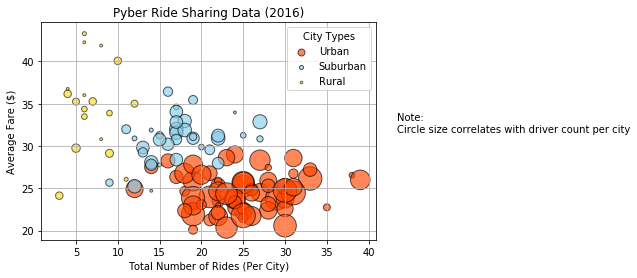

In [6]:
# Scatter plot

# Scalar values for use in scatter plot
s_urban = urban_sum['Driver Count']
s_suburban = suburban_sum['Driver Count']
s_rural = rural_sum['Driver Count']

# Specify individuals scatter plots based on these common categories: 
## x values: total rides
## y values: average fare
## circle size:  driver count
## color: city type (3 colors)
## scalar: ['Drive Count'] 
urban = urban_sum.plot.scatter('Total Rides', 'Average Fare', s=s_urban*8, 
                               c='orangered', alpha=0.65, label='Urban', 
                               edgecolor='black')
suburban = suburban_sum.plot.scatter('Total Rides', 'Average Fare', s=s_suburban*8, 
                                     c='skyblue', alpha=0.65, ax=urban, label='Suburban', 
                                     edgecolor='black')
rural = rural_sum.plot.scatter('Total Rides', 'Average Fare', s=s_rural*8, 
                               c='gold', alpha=0.60, ax=urban, label='Rural', edgecolor='black')

# Label the scatter plot, add grid lines, and add a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(axis='both')
plt.legend(title='City Types', markerscale=0.4)

# Add note to plot explaining circle size
plt.text(0.95, 0.5, "Note:\nCircle size correlates with driver count per city", transform=plt.gcf().transFigure)

# Save pie chart and include note in saved figure
plt.savefig("Pyber_Ride_Sharing_Data_2016_sp.png", bbox_inches='tight')


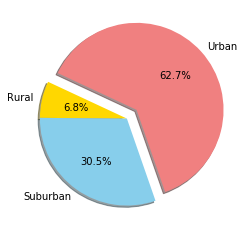

In [32]:
#################
# Pie Charts

# Group merged city and ride data frame by types of cities
grp_city_type = city_ride_data.groupby(['Type'])

# Define parameters for pie chart
# Labels are the city types
labels = ['Rural', 'Suburban', 'Urban']

# Explode sets a part the 'Urban' total fares piece
explode = (0,0, 0.15)

# Define colors for pie chart
colors = ['gold', 'skyblue', 'lightcoral']

## Total Fares by City Type
# Find sum of columns grouped by type of city
grp_city_type_sum = grp_city_type.sum()

# Assign total fare column to separate variable
city_type_sum_fares = grp_city_type_sum['Fare $']

# Plot total fares by city type pie chart 
plt.pie(city_type_sum_fares, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=155)

# Make pie chart a perfect circle
plt.axis("equal")

# Save pie chart
plt.savefig("Total_Fares_by_City_Type.png")

In [ ]:
# Total Rides by City Type

# Find count of columns grouped by type of city
grp_city_type_count = grp_city_type.count()

# Assign count of 'Ride ID' column to separate variable
city_type_count_rides = grp_city_type_count['Ride ID']

# Plot total rides by city type pie chart 
plt.pie(city_type_count_rides, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=120)

# Make pie chart a perfect circle
plt.axis("equal")

# Save pie chart
plt.savefig("Total_Rides_By_City_Type.pns")

In [ ]:
# Total Drivers by City Type

# Assign sum of drivers per type of city to new variable
city_type_total_drivers = grp_city_type_sum['Driver Count']

# Plot total drivers by city type pie charts
plt.pie(city_type_total_drivers, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=120)

# Make pie chart a perfect circle
plt.axis("equal")

# Save pie chart
plt.savefig("Total_Drivers_by_City_Type.png")